# 01 - Exploratory Data Analysis (EDA)

## Diabetic Foot Ulcer Risk Classification

This notebook performs comprehensive EDA on the multi-sensor wearable dataset for early diabetic foot ulcer detection.

### Objectives:
- Load and inspect the dataset structure
- Analyze feature distributions
- Check for missing values and class imbalance
- Visualize correlations between features
- Identify key patterns for risk classification

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Load Dataset

In [2]:
# Load the dataset using relative path
DATA_PATH = '../Synthetic_Data/synthetic_foot_ulcer_dataset_RISK.csv'
df = pd.read_csv(DATA_PATH)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 10000 rows × 20 columns


## 2. Dataset Overview

In [3]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS OF DATASET")
print("=" * 80)
df.head()

FIRST 5 ROWS OF DATASET


,temp_heel,press_heel,temp_ball,press_ball,temp_arch,press_arch,temp_toe,press_toe,spo2,heartRate,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,stepCount,batteryLevel,risk_score,label
0,33.498160,58.028572,34.927976,43.946339,32.624075,26.239781,32.232334,54.647046,95.621089,81,0.239495,-0.478550,9.866665,-34.223433,-42.545393,-9.398040,59,99,0.378454,0
1,32.931085,23.624257,34.473544,35.298480,35.932924,38.670516,35.439762,47.212302,85.198974,119,-6.080159,3.358271,12.137578,-88.087821,90.418256,29.849513,34,97,0.693139,1
2,33.564242,27.289444,35.021446,37.006235,32.831767,42.708013,32.125253,53.691391,90.927254,73,-2.721560,3.565877,12.156596,212.480807,21.078883,131.341689,23,45,0.555218,0
3,35.861021,44.281370,33.103997,31.850940,40.354115,105.342867,33.693606,35.795261,95.935108,92,2.095321,0.520806,11.786854,19.289773,-13.456407,93.181492,32,67,0.662824,1
4,33.483273,46.753650,34.663689,43.651912,33.098887,42.449737,33.531707,58.868484,95.825943,73,10.116889,-2.761172,8.604085,-4.869127,-113.500037,83.399329,95,23,0.388919,0


In [4]:
# Column names and data types
print("=" * 80)
print("COLUMN INFORMATION")
print("=" * 80)
print(f"\nColumn Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "=" * 80)
print("DATA TYPES")
print("=" * 80)
print(df.dtypes)

COLUMN INFORMATION

Column Names (20 total):
   1. temp_heel
   2. press_heel
   3. temp_ball
   4. press_ball
   5. temp_arch
   6. press_arch
   7. temp_toe
   8. press_toe
   9. spo2
  10. heartRate
  11. acc_x
  12. acc_y
  13. acc_z
  14. gyro_x
  15. gyro_y
  16. gyro_z
  17. stepCount
  18. batteryLevel
  19. risk_score
  20. label

DATA TYPES
temp_heel       float64
press_heel      float64
temp_ball       float64
press_ball      float64
temp_arch       float64
press_arch      float64
temp_toe        float64
press_toe       float64
spo2            float64
heartRate         int64
acc_x           float64
acc_y           float64
acc_z           float64
gyro_x          float64
gyro_y          float64
gyro_z          float64
stepCount         int64
batteryLevel      int64
risk_score      float64
label             int64
dtype: object


In [5]:
# Dataset info
print("=" * 80)
print("DATASET INFO")
print("=" * 80)
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_heel     10000 non-null  float64
 1   press_heel    10000 non-null  float64
 2   temp_ball     10000 non-null  float64
 3   press_ball    10000 non-null  float64
 4   temp_arch     10000 non-null  float64
 5   press_arch    10000 non-null  float64
 6   temp_toe      10000 non-null  float64
 7   press_toe     10000 non-null  float64
 8   spo2          10000 non-null  float64
 9   heartRate     10000 non-null  int64  
 10  acc_x         10000 non-null  float64
 11  acc_y         10000 non-null  float64
 12  acc_z         10000 non-null  float64
 13  gyro_x        10000 non-null  float64
 14  gyro_y        10000 non-null  float64
 15  gyro_z        10000 non-null  float64
 16  stepCount     10000 non-null  int64  
 17  batteryLevel  10000 non-null  int64  
 18  risk_score    

In [6]:
# Statistical summary
print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df.describe().T

STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
temp_heel,10000.0,34.378269,1.762984,32.000019,33.097274,34.158626,35.239829,40.995625
press_heel,10000.0,44.107042,18.308926,20.006310,31.295395,41.818591,52.322014,119.698340
temp_ball,10000.0,34.389040,1.783193,32.000501,33.066324,34.168773,35.245051,40.996875
press_ball,10000.0,44.041378,18.509979,20.005621,30.699053,41.645327,52.455993,119.979800
temp_arch,10000.0,34.372392,1.753722,32.000797,33.120193,34.158878,35.197352,40.994857
press_arch,10000.0,43.861945,18.452548,20.001050,30.672406,41.594303,52.136409,119.986875
temp_toe,10000.0,34.389872,1.806882,32.000073,33.056546,34.141239,35.246254,40.991206
press_toe,10000.0,44.240023,18.743535,20.013808,30.931145,41.495666,52.686384,119.974135
spo2,10000.0,92.506623,4.322941,85.000440,88.804962,92.473288,96.218993,99.997251
heartRate,10000.0,94.375700,20.262631,60.000000,76.000000,95.000000,112.000000,129.000000


## 3. Feature Categorization

### Feature Groups:
- **Temperature Sensors**: temp_heel, temp_ball, temp_arch, temp_toe
- **Pressure Sensors**: press_heel, press_ball, press_arch, press_toe
- **Vital Signs**: spo2, heartRate
- **Motion Sensors (Accelerometer)**: acc_x, acc_y, acc_z
- **Motion Sensors (Gyroscope)**: gyro_x, gyro_y, gyro_z
- **Activity**: stepCount
- **System (EXCLUDE from ML)**: batteryLevel
- **Target**: label (0=Normal, 1=High Risk)
- **Output (NOT an input)**: risk_score

In [7]:
# Define feature groups
TEMP_FEATURES = ['temp_heel', 'temp_ball', 'temp_arch', 'temp_toe']
PRESSURE_FEATURES = ['press_heel', 'press_ball', 'press_arch', 'press_toe']
VITAL_FEATURES = ['spo2', 'heartRate']
ACC_FEATURES = ['acc_x', 'acc_y', 'acc_z']
GYRO_FEATURES = ['gyro_x', 'gyro_y', 'gyro_z']
ACTIVITY_FEATURES = ['stepCount']

# Features to EXCLUDE from ML
EXCLUDE_FEATURES = ['batteryLevel', 'risk_score']

# Target column
TARGET = 'label'

# All sensor features for ML
SENSOR_FEATURES = (TEMP_FEATURES + PRESSURE_FEATURES + VITAL_FEATURES + 
                   ACC_FEATURES + GYRO_FEATURES + ACTIVITY_FEATURES)

print(f"Total sensor features for ML: {len(SENSOR_FEATURES)}")
print(f"Features: {SENSOR_FEATURES}")

Total sensor features for ML: 17
Features: ['temp_heel', 'temp_ball', 'temp_arch', 'temp_toe', 'press_heel', 'press_ball', 'press_arch', 'press_toe', 'spo2', 'heartRate', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'stepCount']


## 4. Missing Values Analysis

In [ ]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print(missing_df)
print(f"\n Total missing values: {missing.sum()}")

if missing.sum() == 0:
    print("Dataset has no missing values - ready for analysis!")
else:
    print(" Missing values detected - will need handling before model training.")

MISSING VALUES ANALYSIS
              Missing Count  Missing %
temp_heel                 0        0.0
press_heel                0        0.0
temp_ball                 0        0.0
press_ball                0        0.0
temp_arch                 0        0.0
press_arch                0        0.0
temp_toe                  0        0.0
press_toe                 0        0.0
spo2                      0        0.0
heartRate                 0        0.0
acc_x                     0        0.0
acc_y                     0        0.0
acc_z                     0        0.0
gyro_x                    0        0.0
gyro_y                    0        0.0
gyro_z                    0        0.0
stepCount                 0        0.0
batteryLevel              0        0.0
risk_score                0        0.0
label                     0        0.0

✅ Total missing values: 0
✅ Dataset has no missing values - ready for analysis!


## 5. Class Distribution (Target Variable)

In [ ]:
# Analyze target distribution
print("=" * 80)
print("CLASS DISTRIBUTION")
print("=" * 80)

class_counts = df[TARGET].value_counts()
class_pct = df[TARGET].value_counts(normalize=True) * 100

print(f"\nClass 0 (Normal):     {class_counts[0]:,} samples ({class_pct[0]:.2f}%)")
print(f"Class 1 (High Risk):  {class_counts[1]:,} samples ({class_pct[1]:.2f}%)")

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print(" Dataset shows class imbalance - consider using class weights or resampling.")
else:
    print(" Dataset is relatively balanced.")

CLASS DISTRIBUTION

Class 0 (Normal):     6,692 samples (66.92%)
Class 1 (High Risk):  3,308 samples (33.08%)

Imbalance Ratio: 2.02:1
⚠️ Dataset shows class imbalance - consider using class weights or resampling.


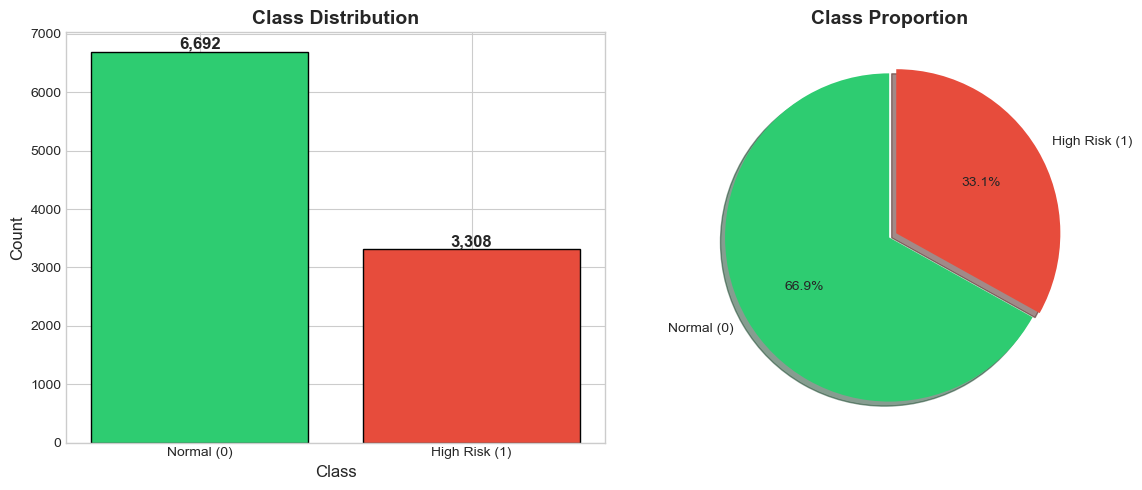

📊 Plot saved: plots/01_class_distribution.png


In [ ]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Normal (0)', 'High Risk (1)'], class_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')

# Add count labels on bars
for bar, count in zip(bars, class_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                 f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Pie chart
axes[1].pie(class_counts.values, labels=['Normal (0)', 'High Risk (1)'], 
            colors=colors, autopct='%1.1f%%', startangle=90,
            explode=(0, 0.05), shadow=True)
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/01_class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/01_class_distribution.png")

## 6. Temperature Sensor Distributions

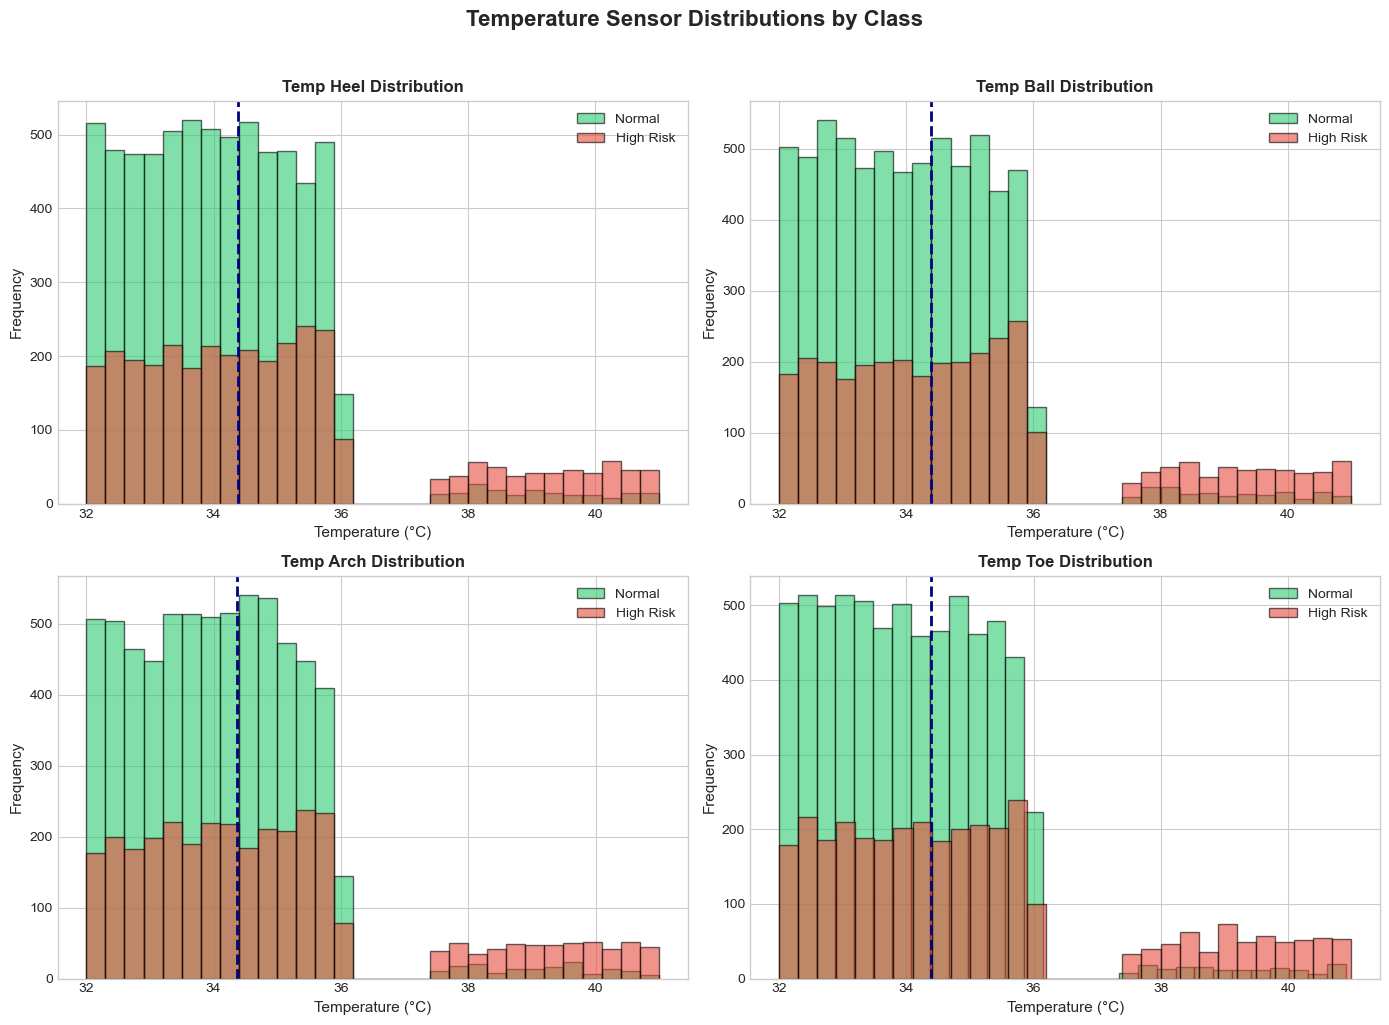

📊 Plot saved: plots/02_temperature_distributions.png


In [ ]:
# Temperature distributions by class
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(TEMP_FEATURES):
    for label, color, name in [(0, '#2ecc71', 'Normal'), (1, '#e74c3c', 'High Risk')]:
        subset = df[df[TARGET] == label][col]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=name, color=color, edgecolor='black')
    
    axes[idx].set_xlabel('Temperature (°C)', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].axvline(df[col].mean(), color='navy', linestyle='--', linewidth=2, label='Mean')

plt.suptitle('Temperature Sensor Distributions by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('plots/02_temperature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved: plots/02_temperature_distributions.png")

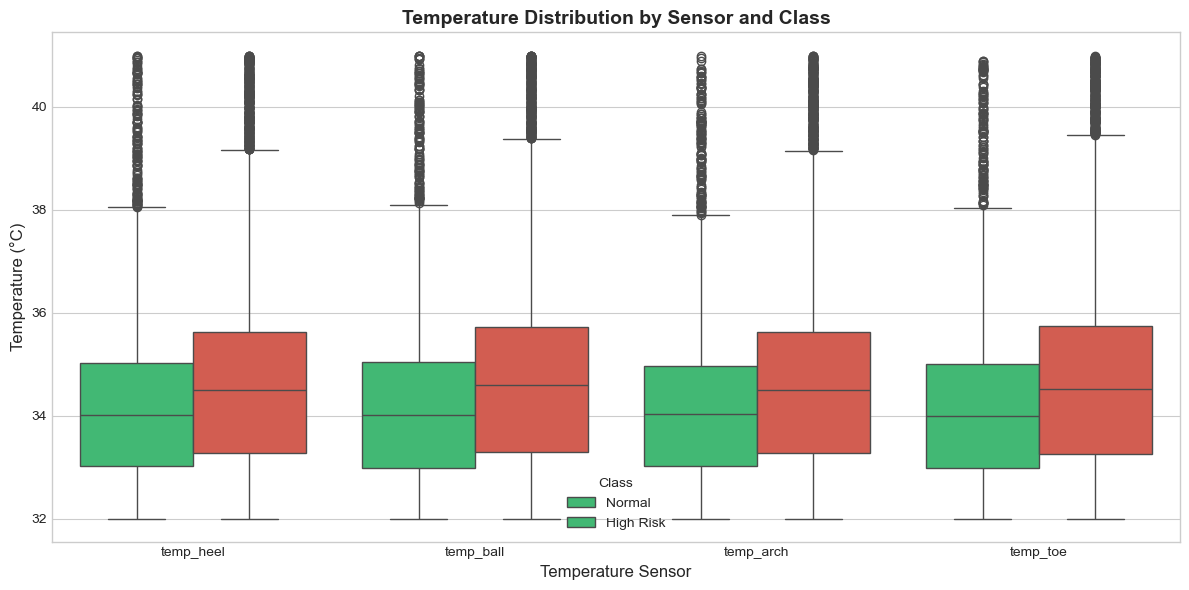

📊 Plot saved: plots/03_temperature_boxplots.png


In [ ]:
# Temperature boxplots by class
fig, ax = plt.subplots(figsize=(12, 6))

temp_data = df[TEMP_FEATURES + [TARGET]].melt(id_vars=TARGET, var_name='Sensor', value_name='Temperature')
sns.boxplot(data=temp_data, x='Sensor', y='Temperature', hue=TARGET, palette=['#2ecc71', '#e74c3c'], ax=ax)

ax.set_xlabel('Temperature Sensor', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature Distribution by Sensor and Class', fontsize=14, fontweight='bold')
ax.legend(title='Class', labels=['Normal', 'High Risk'])

plt.tight_layout()
plt.savefig('plots/03_temperature_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/03_temperature_boxplots.png")

## 7. Pressure Sensor Distributions

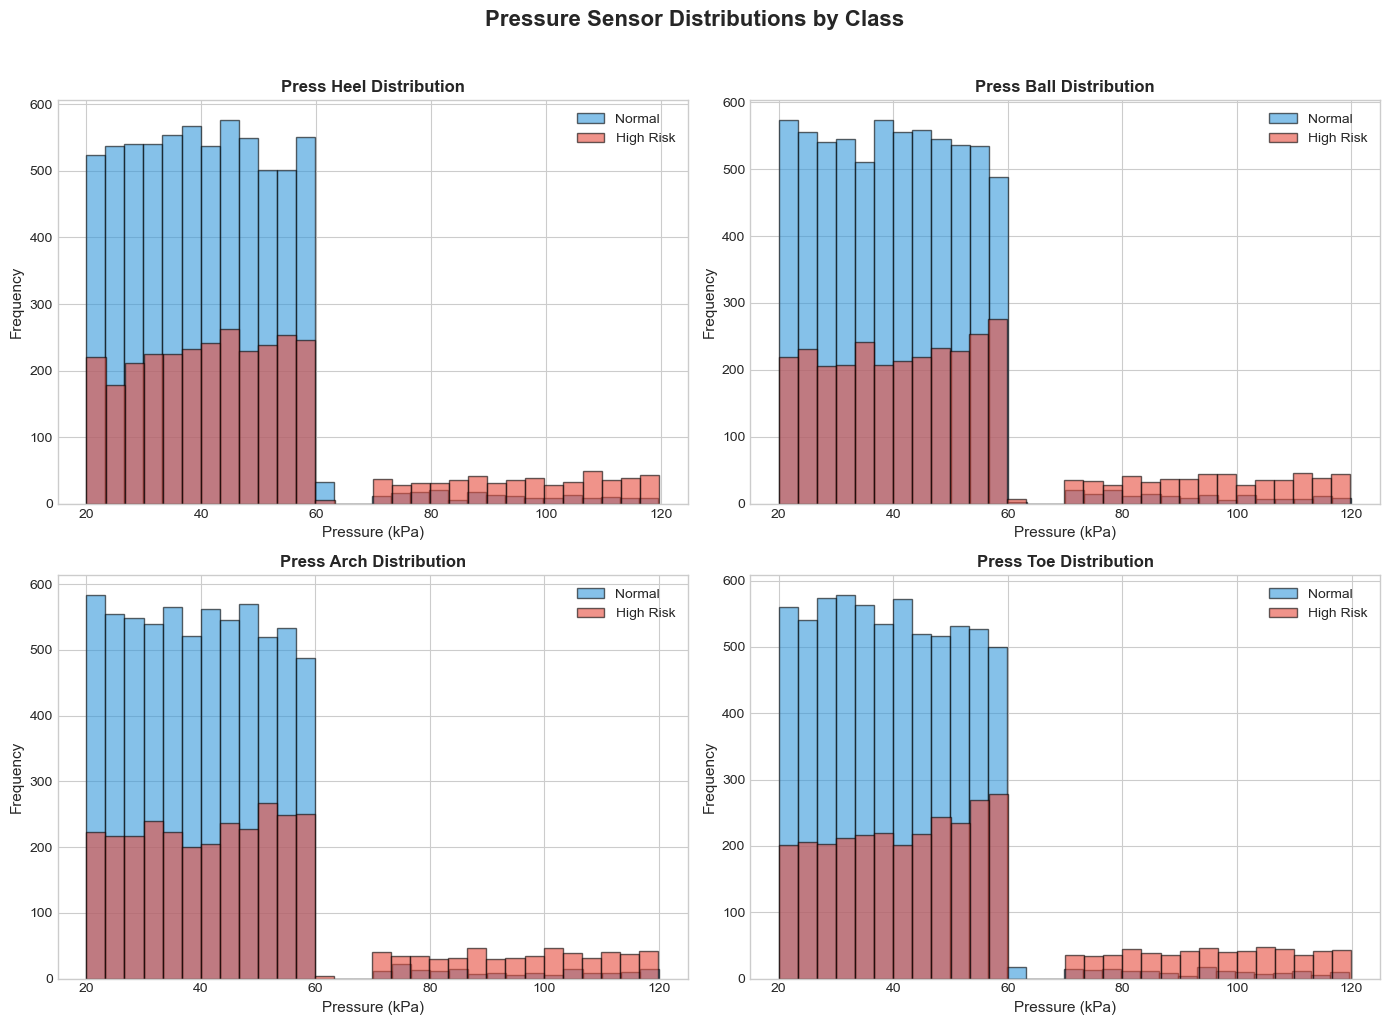

📊 Plot saved: plots/04_pressure_distributions.png


In [ ]:
# Pressure distributions by class
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(PRESSURE_FEATURES):
    for label, color, name in [(0, '#3498db', 'Normal'), (1, '#e74c3c', 'High Risk')]:
        subset = df[df[TARGET] == label][col]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=name, color=color, edgecolor='black')
    
    axes[idx].set_xlabel('Pressure (kPa)', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].legend()

plt.suptitle('Pressure Sensor Distributions by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('plots/04_pressure_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/04_pressure_distributions.png")

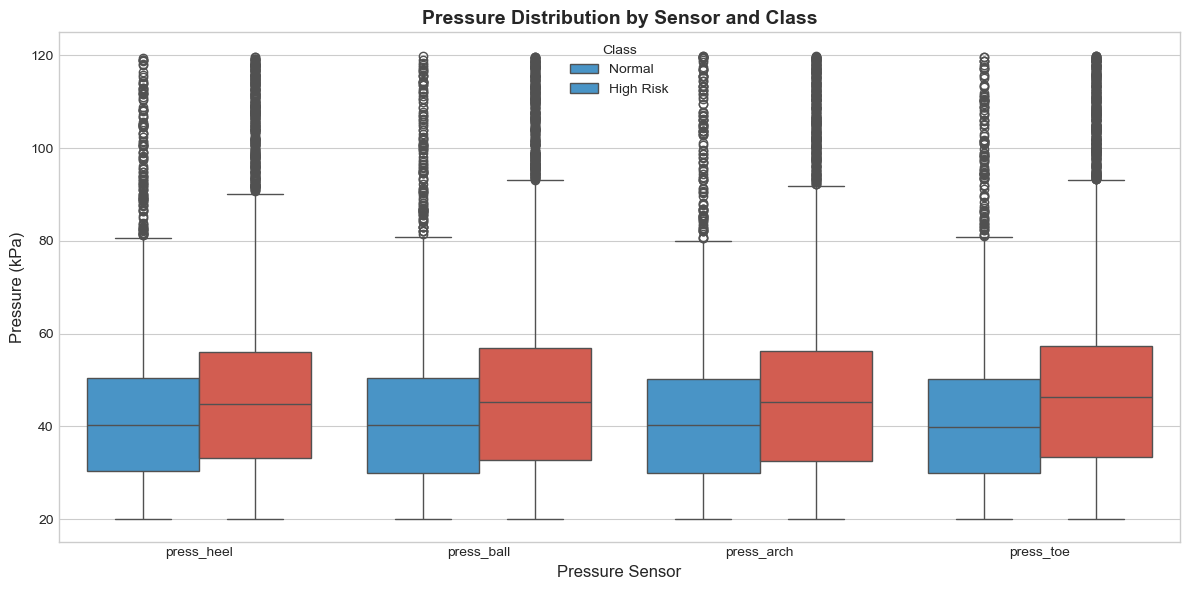

📊 Plot saved: plots/05_pressure_boxplots.png


In [ ]:
# Pressure boxplots by class
fig, ax = plt.subplots(figsize=(12, 6))

press_data = df[PRESSURE_FEATURES + [TARGET]].melt(id_vars=TARGET, var_name='Sensor', value_name='Pressure')
sns.boxplot(data=press_data, x='Sensor', y='Pressure', hue=TARGET, palette=['#3498db', '#e74c3c'], ax=ax)

ax.set_xlabel('Pressure Sensor', fontsize=12)
ax.set_ylabel('Pressure (kPa)', fontsize=12)
ax.set_title('Pressure Distribution by Sensor and Class', fontsize=14, fontweight='bold')
ax.legend(title='Class', labels=['Normal', 'High Risk'])

plt.tight_layout()
plt.savefig('plots/05_pressure_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/05_pressure_boxplots.png")

## 8. Vital Signs (SpO₂ and Heart Rate)

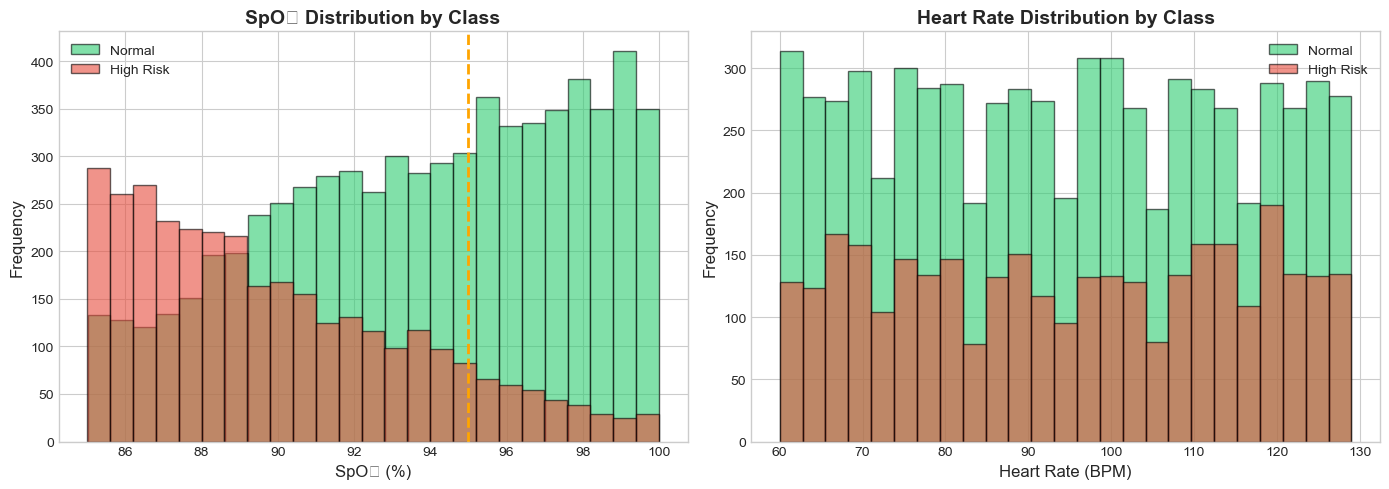

📊 Plot saved: plots/06_vital_signs_distributions.png


In [ ]:
# SpO2 and Heart Rate distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SpO2
for label, color, name in [(0, '#2ecc71', 'Normal'), (1, '#e74c3c', 'High Risk')]:
    subset = df[df[TARGET] == label]['spo2']
    axes[0].hist(subset, bins=25, alpha=0.6, label=name, color=color, edgecolor='black')

axes[0].set_xlabel('SpO₂ (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('SpO₂ Distribution by Class', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].axvline(95, color='orange', linestyle='--', linewidth=2, label='Normal threshold (95%)')

# Heart Rate
for label, color, name in [(0, '#2ecc71', 'Normal'), (1, '#e74c3c', 'High Risk')]:
    subset = df[df[TARGET] == label]['heartRate']
    axes[1].hist(subset, bins=25, alpha=0.6, label=name, color=color, edgecolor='black')

axes[1].set_xlabel('Heart Rate (BPM)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Heart Rate Distribution by Class', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('plots/06_vital_signs_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved: plots/06_vital_signs_distributions.png")

## 9. Motion Sensor Distributions (Accelerometer & Gyroscope)

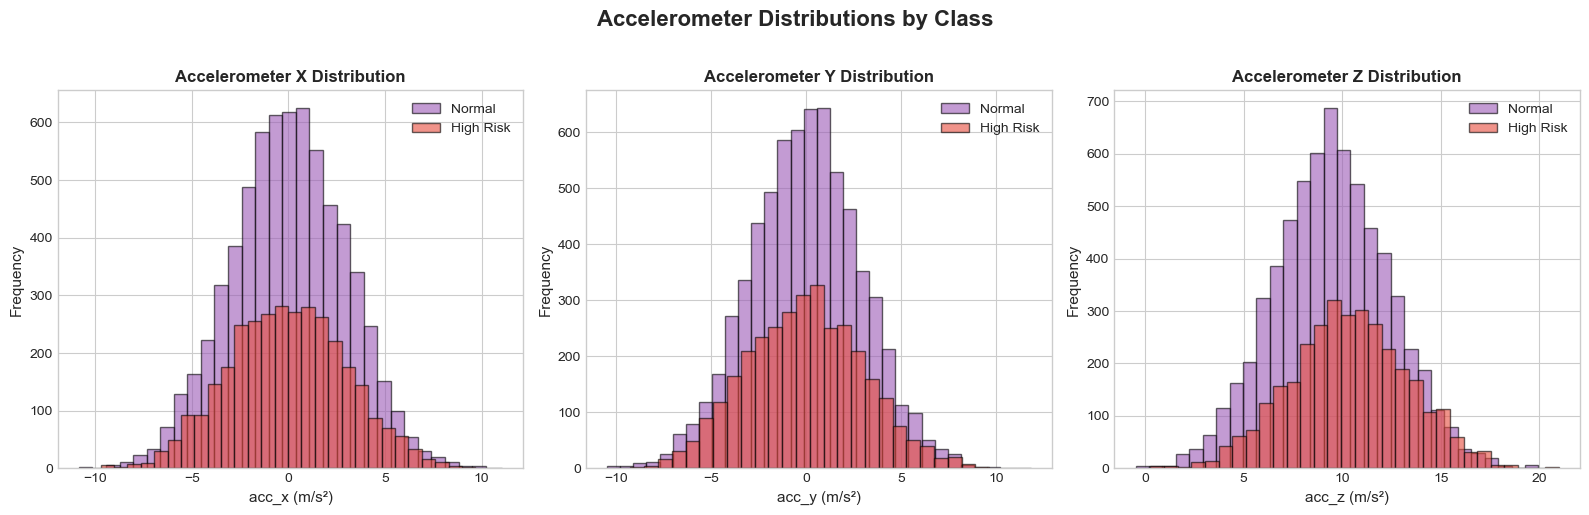

📊 Plot saved: plots/07_accelerometer_distributions.png


In [ ]:
# Accelerometer distributions
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(ACC_FEATURES):
    for label, color, name in [(0, '#9b59b6', 'Normal'), (1, '#e74c3c', 'High Risk')]:
        subset = df[df[TARGET] == label][col]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=name, color=color, edgecolor='black')
    
    axes[idx].set_xlabel(f'{col} (m/s²)', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Accelerometer {col[-1].upper()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].legend()

plt.suptitle('Accelerometer Distributions by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('plots/07_accelerometer_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved: plots/07_accelerometer_distributions.png")

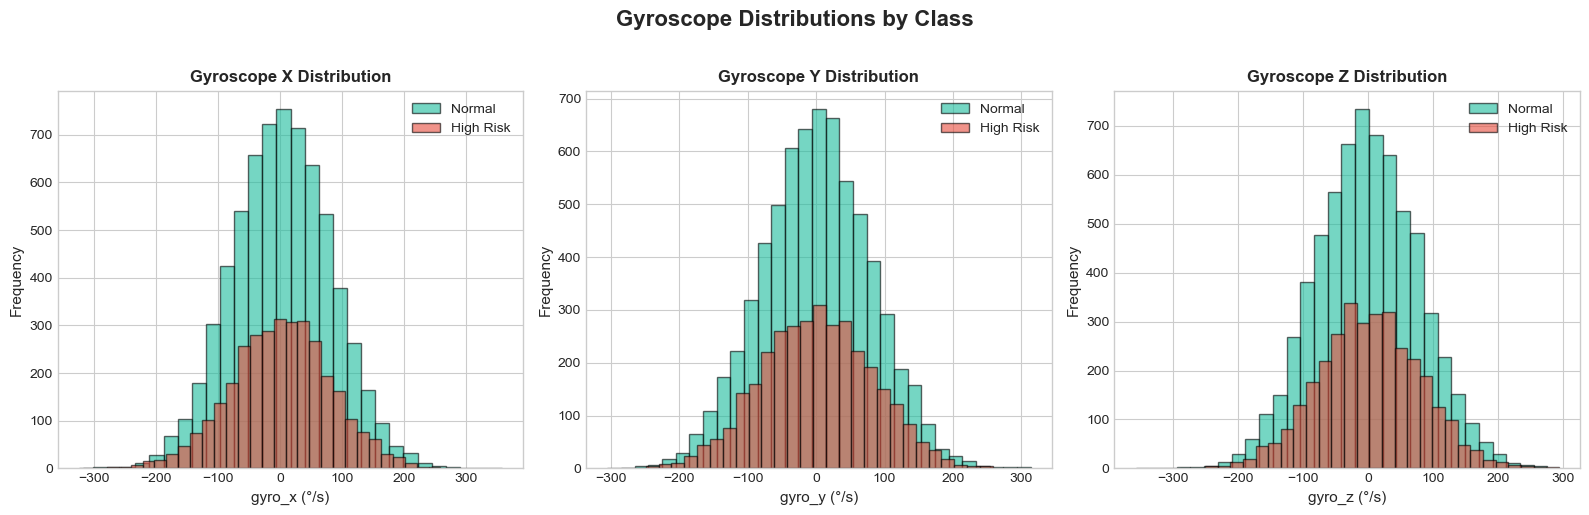

📊 Plot saved: plots/08_gyroscope_distributions.png


In [ ]:
# Gyroscope distributions
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(GYRO_FEATURES):
    for label, color, name in [(0, '#1abc9c', 'Normal'), (1, '#e74c3c', 'High Risk')]:
        subset = df[df[TARGET] == label][col]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=name, color=color, edgecolor='black')
    
    axes[idx].set_xlabel(f'{col} (°/s)', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Gyroscope {col[-1].upper()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].legend()

plt.suptitle('Gyroscope Distributions by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('plots/08_gyroscope_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved: plots/08_gyroscope_distributions.png")

## 10. Correlation Heatmap

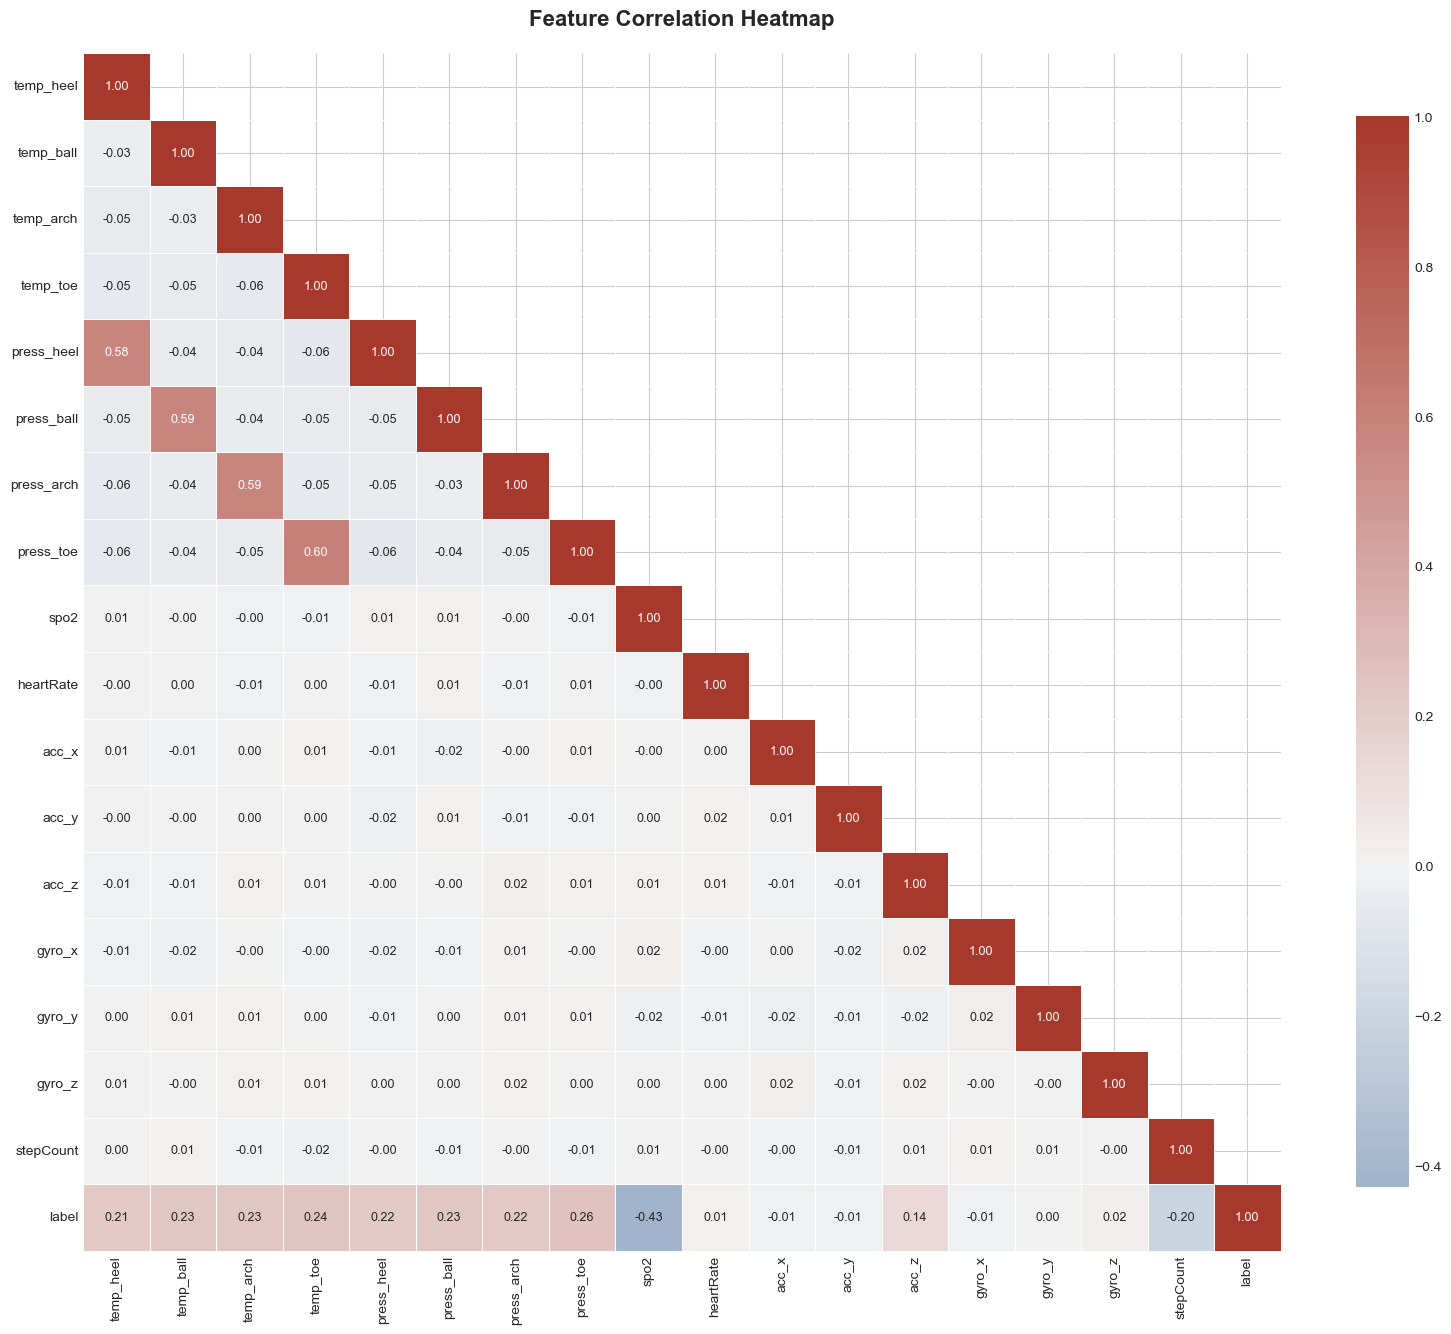

📊 Plot saved: plots/09_correlation_heatmap.png


In [ ]:
# Compute correlation matrix for sensor features
correlation_features = SENSOR_FEATURES + [TARGET]
corr_matrix = df[correlation_features].corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(16, 14))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center='light', as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap=cmap,
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8},
            annot_kws={'size': 9}, ax=ax)

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('plots/09_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/09_correlation_heatmap.png")

FEATURE CORRELATION WITH TARGET (label)


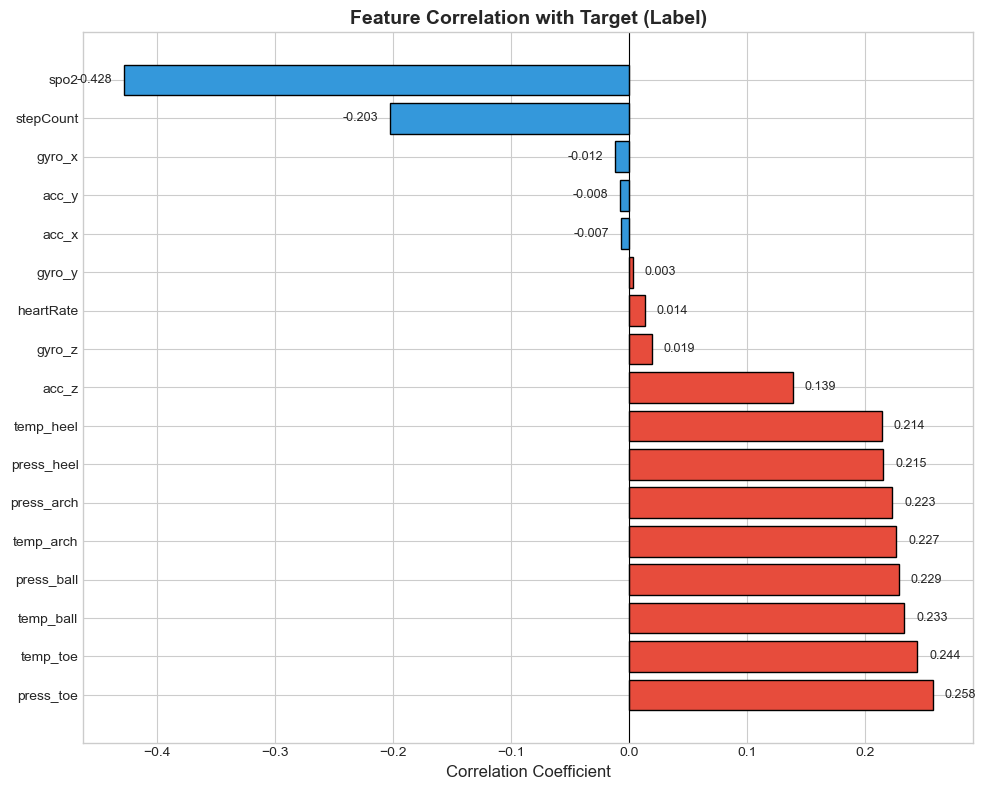

📊 Plot saved: plots/10_target_correlation.png

Top correlations with target:
press_toe     0.257593
temp_toe      0.244206
temp_ball     0.233388
press_ball    0.228686
temp_arch     0.226533
press_arch    0.223160
press_heel    0.215398
temp_heel     0.214032
acc_z         0.139068
gyro_z        0.019141
heartRate     0.013523
gyro_y        0.003208
acc_x        -0.006670
acc_y        -0.008075
gyro_x       -0.012061
stepCount    -0.202754
spo2         -0.428292
Name: label, dtype: float64


In [ ]:
# Feature correlations with target
target_corr = corr_matrix[TARGET].drop(TARGET).sort_values(ascending=False)

print("=" * 80)
print("FEATURE CORRELATION WITH TARGET (label)")
print("=" * 80)

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_corr.values]
bars = ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black')

ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Feature Correlation with Target (Label)', fontsize=14, fontweight='bold')

# Add value labels
for bar, val in zip(bars, target_corr.values):
    x_pos = val + 0.01 if val >= 0 else val - 0.01
    ha = 'left' if val >= 0 else 'right'
    ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
            ha=ha, va='center', fontsize=9)

plt.tight_layout()
plt.savefig('plots/10_target_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/10_target_correlation.png")
print("\nTop correlations with target:")
print(target_corr)

## 11. Feature Engineering Preview

The following engineered features will be created for model training:
- `max_pressure`: Maximum pressure across all foot zones
- `pressure_variance`: Variance in pressure readings
- `max_temp`: Maximum temperature across all foot zones
- `temp_variance`: Variance in temperature readings
- `acc_magnitude`: √(acc_x² + acc_y² + acc_z²)
- `gyro_magnitude`: √(gyro_x² + gyro_y² + gyro_z²)

In [20]:
# Preview engineered features
df_preview = df.copy()

# Pressure features
df_preview['max_pressure'] = df_preview[PRESSURE_FEATURES].max(axis=1)
df_preview['pressure_variance'] = df_preview[PRESSURE_FEATURES].var(axis=1)

# Temperature features
df_preview['max_temp'] = df_preview[TEMP_FEATURES].max(axis=1)
df_preview['temp_variance'] = df_preview[TEMP_FEATURES].var(axis=1)

# Motion magnitude features
df_preview['acc_magnitude'] = np.sqrt(
    df_preview['acc_x']**2 + df_preview['acc_y']**2 + df_preview['acc_z']**2
)
df_preview['gyro_magnitude'] = np.sqrt(
    df_preview['gyro_x']**2 + df_preview['gyro_y']**2 + df_preview['gyro_z']**2
)

ENGINEERED_FEATURES = ['max_pressure', 'pressure_variance', 'max_temp', 
                       'temp_variance', 'acc_magnitude', 'gyro_magnitude']

print("=" * 80)
print("ENGINEERED FEATURES PREVIEW")
print("=" * 80)
df_preview[ENGINEERED_FEATURES].describe()

ENGINEERED FEATURES PREVIEW


,max_pressure,pressure_variance,max_temp,temp_variance,acc_magnitude,gyro_magnitude
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,64.596223,359.000757,36.376418,3.301407,10.671380,127.558684
std,21.680199,431.893589,1.989464,3.612137,2.822650,53.745618
min,24.814384,0.256188,32.280170,0.002370,1.174682,4.907324
25%,50.888792,92.210175,35.082359,0.899668,8.763291,88.603606
50%,56.688439,175.441829,35.664349,1.729986,10.611316,123.028521
75%,76.954200,417.771393,37.997981,4.628611,12.573150,161.748950
max,119.986875,2236.700968,40.996875,17.289692,21.509454,394.913082


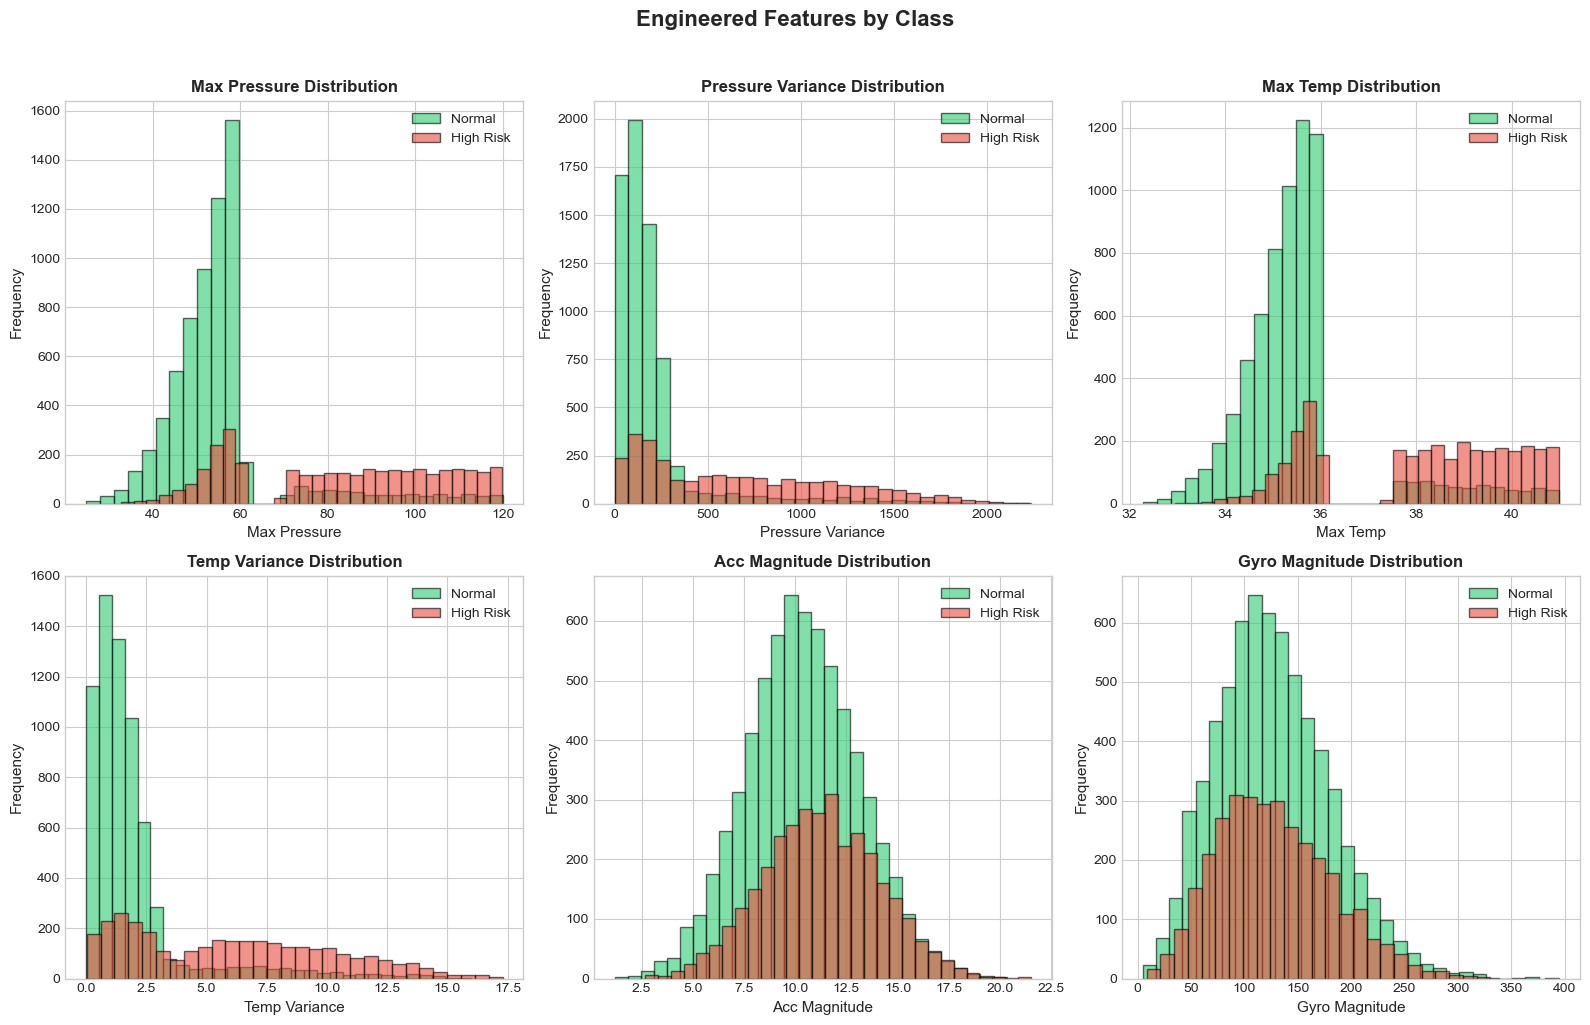

📊 Plot saved: plots/11_engineered_features.png


In [ ]:
# Visualize engineered features by class
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(ENGINEERED_FEATURES):
    for label, color, name in [(0, '#2ecc71', 'Normal'), (1, '#e74c3c', 'High Risk')]:
        subset = df_preview[df_preview[TARGET] == label][col]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=name, color=color, edgecolor='black')
    
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].legend()

plt.suptitle('Engineered Features by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('plots/11_engineered_features.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Plot saved: plots/11_engineered_features.png")

## 12. Key Observations Summary

### Dataset Overview:
- Multi-sensor wearable data for diabetic foot ulcer risk prediction
- Binary classification target: Normal (0) vs High Risk (1)

### Feature Categories:
1. **Temperature Sensors (4)**: Heel, Ball, Arch, Toe
2. **Pressure Sensors (4)**: Heel, Ball, Arch, Toe
3. **Vital Signs (2)**: SpO₂, Heart Rate
4. **Motion Sensors (6)**: Accelerometer (x,y,z), Gyroscope (x,y,z)
5. **Activity (1)**: Step Count

### Features EXCLUDED from ML:
- `batteryLevel`: System-level, not physiological
- `risk_score`: Model output, not input

### Engineered Features (6):
- `max_pressure`, `pressure_variance`
- `max_temp`, `temp_variance`
- `acc_magnitude`, `gyro_magnitude`

### Next Steps:
1. Train Random Forest classifier (primary model)
2. Train Logistic Regression (baseline)
3. Convert models to TensorFlow Lite for mobile deployment

In [ ]:
# Final summary statistics
print("=" * 80)
print("EDA SUMMARY")
print("=" * 80)
print(f"\n Dataset Shape: {df.shape}")
print(f" Total Samples: {len(df):,}")
print(f" Features for ML: {len(SENSOR_FEATURES)} raw + {len(ENGINEERED_FEATURES)} engineered")
print(f" Class Distribution: Normal={class_counts[0]:,}, High Risk={class_counts[1]:,}")
print(f" Missing Values: {df.isnull().sum().sum()}")
print(f"\n EDA Complete! Ready for model training.")
print(f"\n Plots saved to: plots/")

EDA SUMMARY

📊 Dataset Shape: (10000, 20)
📊 Total Samples: 10,000
📊 Features for ML: 17 raw + 6 engineered
📊 Class Distribution: Normal=6,692, High Risk=3,308
📊 Missing Values: 0

✅ EDA Complete! Ready for model training.

📁 Plots saved to: plots/
